# **1. Perkenalan Dataset**


1. **Sumber Dataset**:  
   Dataset yang digunakan dalam proyek ini berasal dari kaggle dengan nama "Fish species sampling data - legnth and weight" untuk mengakses sumber datasetnya https://www.kaggle.com/datasets/taweilo/fish-species-sampling-weight-and-height-data oleh Ta-wei Lo. Dataset ini berisi informasi tentang berbagai spesies ikan dengan atribut seperti panjang, berat, dan rasio berat terhadap panjang.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Mengandung data numerikal (panjang, berat, rasio) dan data kategorikal (spesies ikan).

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

In [133]:
# Import library yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.feature_selection import SelectKBest, f_classif

# **3. Memuat Dataset**

In [134]:
# Memuat dataset dari URL GitHub
url = "https://raw.githubusercontent.com/NaufalNurFahriza/machine-learning-pemula-dicoding/main/%5BClustering%5D_Submission_Akhir_BMLP-Naufal_Nur_Fahriza.csv"
df = pd.read_csv(url)

# Menampilkan beberapa baris awal dataset
print(df.head())

# Menampilkan informasi dasar tentang dataset
print(df.info())

# Menampilkan statistik deskriptif
print(df.describe())

              species  length  weight  w_l_ratio
0  Anabas testudineus   10.66    3.45       0.32
1  Anabas testudineus    6.91    3.27       0.47
2  Anabas testudineus    8.38    3.46       0.41
3  Anabas testudineus    7.57    3.36       0.44
4  Anabas testudineus   10.83    3.38       0.31
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4080 entries, 0 to 4079
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   species    4080 non-null   object 
 1   length     4080 non-null   float64
 2   weight     4080 non-null   float64
 3   w_l_ratio  4080 non-null   float64
dtypes: float64(3), object(1)
memory usage: 127.6+ KB
None
            length       weight    w_l_ratio
count  4080.000000  4080.000000  4080.000000
mean     17.353544     3.739875     0.252782
std       7.114684     1.040365     0.123046
min       6.360000     2.050000     0.080000
25%      11.327500     3.070000     0.170000
50%      17.350000     3.310000

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

Jumlah baris dan kolom: (4080, 4)

Jenis data di setiap kolom:
species       object
length       float64
weight       float64
w_l_ratio    float64
dtype: object

Jumlah data yang hilang per kolom:
species      0
length       0
weight       0
w_l_ratio    0
dtype: int64

Statistik deskriptif untuk kolom numerikal:
            length       weight    w_l_ratio
count  4080.000000  4080.000000  4080.000000
mean     17.353544     3.739875     0.252782
std       7.114684     1.040365     0.123046
min       6.360000     2.050000     0.080000
25%      11.327500     3.070000     0.170000
50%      17.350000     3.310000     0.190000
75%      22.585000     4.100000     0.340000
max      33.860000     6.290000     0.640000


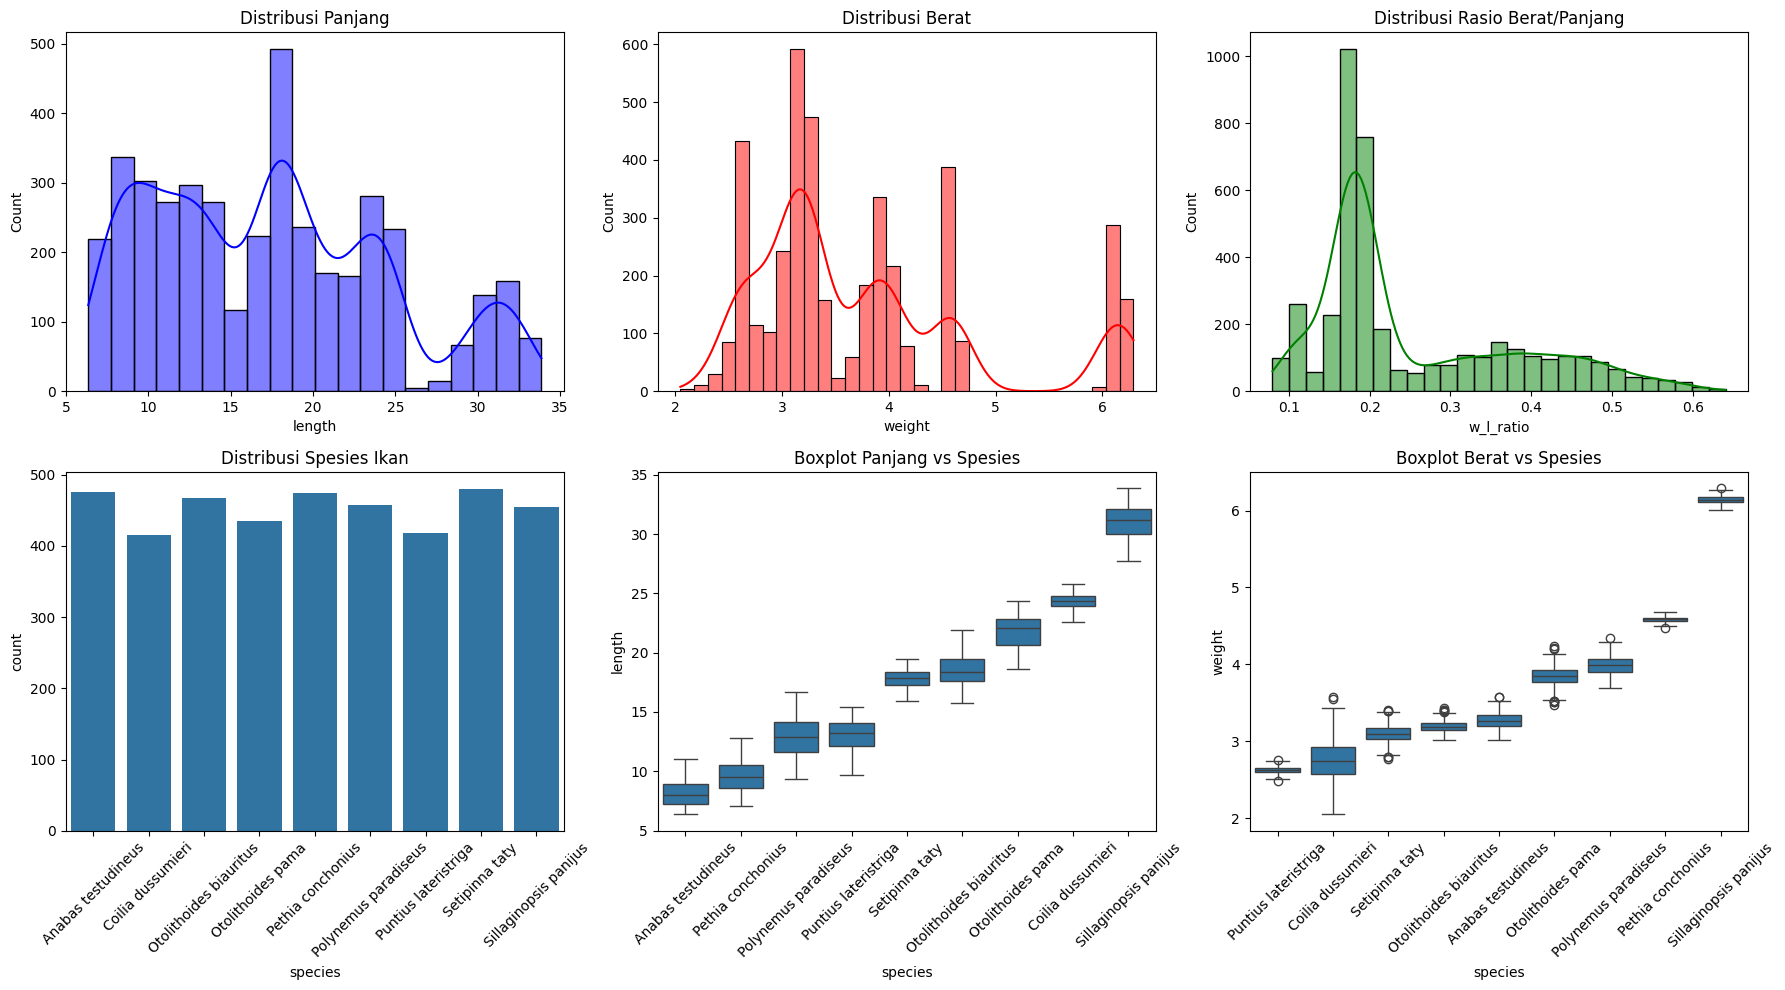

In [135]:
import matplotlib.pyplot as plt
import seaborn as sns

# Memahami Struktur Data
print("Jumlah baris dan kolom:", df.shape)
print("\nJenis data di setiap kolom:")
print(df.dtypes)

# Menangani Data yang Hilang
print("\nJumlah data yang hilang per kolom:")
print(df.isnull().sum())

# Analisis Distribusi dan Korelasi
print("\nStatistik deskriptif untuk kolom numerikal:")
print(df.describe())

# Visualisasi distribusi variabel numerik, kategori, dan boxplot dalam satu figure
fig, axes = plt.subplots(2, 3, figsize=(18, 10))  # 2 baris, 3 kolom

# Histogram untuk panjang
sns.histplot(df['length'], kde=True, color='blue', ax=axes[0, 0])
axes[0, 0].set_title('Distribusi Panjang')

# Histogram untuk berat
sns.histplot(df['weight'], kde=True, color='red', ax=axes[0, 1])
axes[0, 1].set_title('Distribusi Berat')

# Histogram untuk rasio berat/panjang
sns.histplot(df['w_l_ratio'], kde=True, color='green', ax=axes[0, 2])
axes[0, 2].set_title('Distribusi Rasio Berat/Panjang')

# Countplot untuk distribusi spesies
sns.countplot(data=df, x='species', ax=axes[1, 0])
axes[1, 0].set_title('Distribusi Spesies Ikan')
axes[1, 0].tick_params(axis='x', rotation=45)  # Rotasi label sumbu x

# Boxplot untuk panjang berdasarkan spesies
sns.boxplot(data=df, x="species", y="length", order=df.groupby("species")["length"].median().sort_values().index, ax=axes[1, 1])
axes[1, 1].set_title('Boxplot Panjang vs Spesies')
axes[1, 1].tick_params(axis='x', rotation=45)  # Rotasi label sumbu x

# Boxplot untuk berat berdasarkan spesies
sns.boxplot(data=df, x="species", y="weight", order=df.groupby("species")["weight"].median().sort_values().index, ax=axes[1, 2])
axes[1, 2].set_title('Boxplot Berat vs Spesies')
axes[1, 2].tick_params(axis='x', rotation=45)  # Rotasi label sumbu x

plt.tight_layout()
plt.show()

# **5. Data Preprocessing**

In [136]:
# Menangani Data Kosong (Missing Values)
df.dropna(inplace=True)  # Menghapus baris dengan data kosong

# Menghapus Data Duplikat
df.drop_duplicates(inplace=True)

# Normalisasi atau Standarisasi Fitur
scaler = StandardScaler()
df_normalized = pd.DataFrame(scaler.fit_transform(df[['length', 'weight', 'w_l_ratio']]), columns=['length', 'weight', 'w_l_ratio'])

# Deteksi dan Penanganan Outlier
Q1 = df_normalized.quantile(0.25)
Q3 = df_normalized.quantile(0.75)
IQR = Q3 - Q1
df_normalized = df_normalized[~((df_normalized < (Q1 - 1.5 * IQR)) | (df_normalized > (Q3 + 1.5 * IQR))).any(axis=1)]

# Encoding Data Kategorikal (jika diperlukan)
df['species'] = df['species'].astype('category').cat.codes  # Encoding label untuk spesies

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

In [137]:
# Pilih algoritma clustering (KMeans)
kmeans_ = KMeans(n_clusters=10, random_state=42)

# Latih model dengan fitur length, weight, dan w_l_ratio
df_normalized['Cluster'] = kmeans_.fit_predict(df_normalized[['length', 'weight', 'w_l_ratio']])

## **b. Evaluasi Model Clustering**

Cluster 2: Silhouette Score = 0.5925
Cluster 3: Silhouette Score = 0.5237
Cluster 4: Silhouette Score = 0.4433
Cluster 5: Silhouette Score = 0.4893
Cluster 6: Silhouette Score = 0.5575
Cluster 7: Silhouette Score = 0.6261
Cluster 8: Silhouette Score = 0.6195
Cluster 9: Silhouette Score = 0.6162
Cluster 10: Silhouette Score = 0.5348

Jumlah cluster optimal berdasarkan Silhouette Score: 7


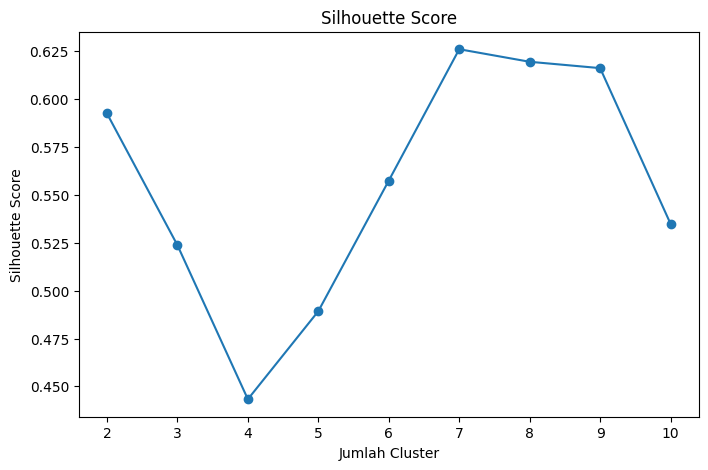

In [138]:
# Data yang digunakan untuk clustering
features = ['length', 'weight', 'w_l_ratio']
X = df_normalized[features]

# Menentukan jumlah cluster optimal menggunakan Silhouette Score
silhouette_scores = []
best_k = 2
best_score = -1

for k in range(2, 11):  # Minimal 2 cluster
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    silhouette_scores.append(score)

    print(f"Cluster {k}: Silhouette Score = {score:.4f}")

    if score > best_score:
        best_k = k
        best_score = score

print(f"\nJumlah cluster optimal berdasarkan Silhouette Score: {best_k}")

# Visualisasi Silhouette Score
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='-')
plt.title('Silhouette Score')
plt.xlabel('Jumlah Cluster')
plt.ylabel('Silhouette Score')
plt.show()

## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

## **d. Visualisasi Hasil Clustering**

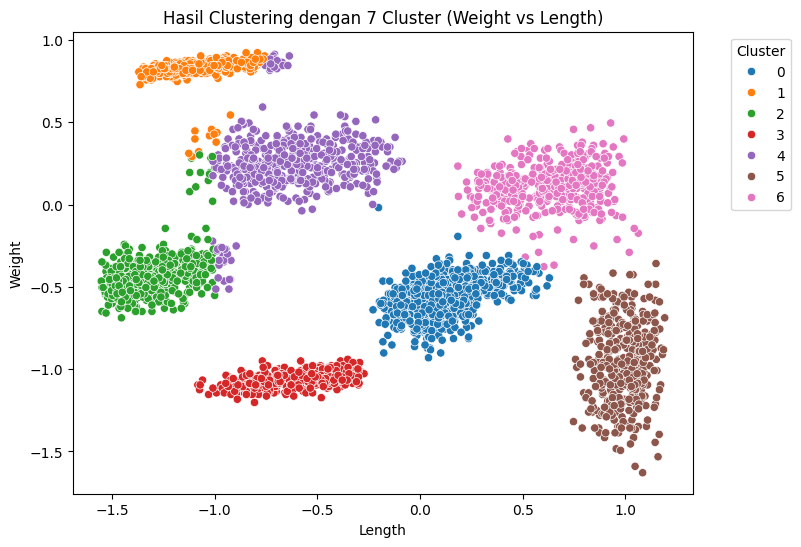

In [145]:
# Menerapkan clustering dengan jumlah cluster terbaik
kmeans = KMeans(n_clusters=best_k, random_state=42)
df_normalized['Cluster'] = kmeans.fit_predict(X)

# Warna untuk setiap cluster
unique_clusters = sorted(df_normalized['Cluster'].unique())
palette = sns.color_palette("tab10", len(unique_clusters))

# Scatter plot berdasarkan length dan weight
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_normalized, x='length', y='weight', hue='Cluster', palette=palette, hue_order=unique_clusters)
plt.title(f'Hasil Clustering dengan {best_k} Cluster (Weight vs Length)')
plt.xlabel('Length')
plt.ylabel('Weight')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

In [148]:
# Analisis karakteristik tiap cluster
df_normalized['Cluster'] = kmeans.labels_
cluster_analysis = df_normalized.groupby('Cluster').mean()
print(cluster_analysis)


           length    weight  w_l_ratio
Cluster                               
0        0.116513 -0.562757  -0.638148
1       -1.098054  0.820160   1.889627
2       -1.304645 -0.430374   1.288527
3       -0.605853 -1.064103  -0.396641
4       -0.618623  0.252729   0.484744
5        0.991748 -0.957296  -1.136045
6        0.634928  0.111196  -0.615136


# Analisis Karakteristik Cluster dari Model KMeans

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia, yaitu panjang ikan (length), berat ikan (weight), dan rasio berat terhadap panjang (w_l_ratio).

Analisis ini bertujuan untuk memahami perbedaan antara masing-masing cluster dan melihat apakah ada pola yang dapat dimanfaatkan.

## Cluster 0:
- **Rata-rata length ikan :** 0.12 (slightly above average)
- **Rata-rata weight :** -0.56 (lighter than average)  
- **Weight-to-length ratio :** -0.64 (low)
- **Analisis:** Ikan dalam cluster ini memiliki panjang mendekati rata-rata tetapi dengan berat yang lebih ringan. Rasio berat terhadap panjang yang rendah menunjukkan bahwa ikan dalam kelompok ini cenderung memiliki tubuh yang lebih ramping dibandingkan dengan kelompok lainnya.

## Cluster 1:
- **Rata-rata length ikan :** -1.10 (very short)
- **Rata-rata weight :** 0.82 (heavier than average)
- **Weight-to-length ratio :** 1.89 (very high)
- **Analisis:** Ikan dalam cluster ini memiliki panjang yang sangat pendek tetapi beratnya lebih besar dari rata-rata. Rasio berat terhadap panjang yang sangat tinggi menunjukkan bahwa ikan dalam kelompok ini cenderung lebih gemuk atau memiliki tubuh yang lebih berisi dibandingkan kelompok lainnya.

## Cluster 2:
- **Rata-rata length ikan :** -1.30 (very short)
- **Rata-rata weight :** -0.43 (lighter than average)
- **Weight-to-length ratio :** 1.29 (high)
- **Analisis:** Ikan dalam cluster ini memiliki ukuran yang sangat pendek dan berat yang lebih ringan dari rata-rata, tetapi rasio berat terhadap panjangnya masih cukup tinggi. Hal ini menunjukkan bahwa ikan dalam kelompok ini tetap memiliki tubuh yang cukup berisi meskipun ukurannya kecil.

## Cluster 3:
- **Rata-rata length ikan :** -0.61 (slightly short)
- **Rata-rata weight :** -1.06 (much lighter than average)
- **Weight-to-length ratio :** -0.40 (low)
- **Analisis:** Ikan dalam cluster ini memiliki panjang yang sedikit lebih pendek tetapi beratnya jauh lebih ringan dari rata-rata. Rasio berat terhadap panjang yang rendah menunjukkan bahwa ikan dalam kelompok ini cenderung bertubuh sangat ramping atau kurus.

## Cluster 4:
- **Rata-rata length ikan (k$):** -0.62 (slightly short)
- **Rata-rata weight (1-100):** 0.25 (slightly heavier than average)
- **Weight-to-length ratio (1-100):** 0.48 (moderate)
- **Analisis:** Ikan dalam cluster ini memiliki panjang yang sedikit lebih pendek dari rata-rata, tetapi beratnya sedikit lebih besar. Rasio berat terhadap panjang yang moderat menunjukkan bahwa ikan dalam kelompok ini memiliki tubuh yang cukup proporsional dibandingkan kelompok lainnya.

## Cluster 5:
- **Rata-rata length ikan :** 0.99 (long)
- **Rata-rata weight :** -0.96 (much lighter than average)
- **Weight-to-length ratio :** -1.14 (very low)
- **Analisis:** Ikan dalam cluster ini memiliki ukuran yang lebih panjang tetapi lebih ringan dibandingkan rata-rata. Rasio berat terhadap panjang yang sangat rendah menunjukkan bahwa ikan dalam kelompok ini sangat ramping dan kurus, mungkin berasal dari spesies yang memiliki tubuh panjang tetapi tidak terlalu berat.

## Cluster 6:
- **Rata-rata length ikan :** 0.63 (long)
- **Rata-rata weight :** 0.11 (slightly heavier than average)
- **Weight-to-length ratio :** -0.62 (low)
- **Analisis:** Ikan dalam cluster ini memiliki panjang yang lebih besar dari rata-rata dan berat yang sedikit lebih tinggi. Namun, rasio berat terhadap panjang yang rendah menunjukkan bahwa ikan dalam kelompok ini tetap memiliki tubuh yang ramping dibandingkan dengan ikan lain yang memiliki panjang serupa.

## Kesimpulan :
Hasil clustering menunjukkan bahwa ikan dapat dikelompokkan berdasarkan kombinasi panjang, berat, dan rasio berat terhadap panjang. Beberapa cluster berisi ikan yang gemuk dan pendek, sementara yang lain berisi ikan yang panjang tetapi ramping.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [143]:
# Menyimpan hasil clustering ke file CSV
df_normalized.to_csv('hasil_clustering.csv', index=False)
print("Data hasil clustering telah disimpan ke 'hasil_clustering.csv'.")

Data hasil clustering telah disimpan ke 'hasil_clustering.csv'.
